In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # solve dead Kernel

import tensorflow as tf
import numpy as np

from matplotlib import pyplot

# Original Model (without noises)

In [2]:
mnist = tf.keras.datasets.mnist # hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# narrow down the training sample size to 118
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
np.random.seed(2021)
train_size = 0.002
index = np.random.rand(len(x)) < train_size
x_train, x_test = x[index], x[~index]
y_train, y_test = y[index], y[~index]

In [3]:
# normalize 
x_train = tf.keras.utils.normalize(x_train, axis = 1) 
x_test = tf.keras.utils.normalize(x_test, axis = 1)


model = tf.keras.models.Sequential() # feedforward
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #output layer; probability

model.compile(optimer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
# fit the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, verbose = 0)
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose = 0)
_, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 1.000, Test: 0.740


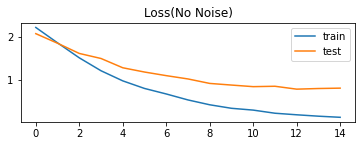

In [4]:
# plot loss during training
pyplot.subplot(211)
pyplot.title("Loss(No Noise)")
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()

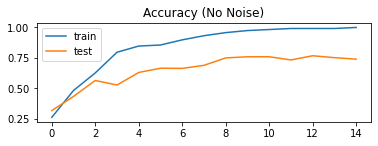

In [5]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title("Accuracy (No Noise)")
pyplot.plot(history.history['accuracy'], label = 'train')
pyplot.plot(history.history['val_accuracy'], label = 'test')
pyplot.legend()

# Adding Noises to Input Layer

In [6]:
mnist = tf.keras.datasets.mnist # hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# narrow down the training sample size to 118
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
np.random.seed(2021)
train_size = 0.002
index = np.random.rand(len(x)) < train_size
x_train, x_test = x[index], x[~index]
y_train, y_test = y[index], y[~index]

In [7]:
# normalize 
x_train = tf.keras.utils.normalize(x_train, axis = 1) 
x_test = tf.keras.utils.normalize(x_test, axis = 1)


model = tf.keras.models.Sequential() # feedforward
model.add(tf.keras.layers.Flatten())

# Noise Layer
model.add(tf.keras.layers.GaussianNoise(0.1))

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #output layer; probability

model.compile(optimer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, verbose = 0)
_, train_acc = model.evaluate(x_train, y_train, verbose = 0)
_, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 1.000, Test: 0.768


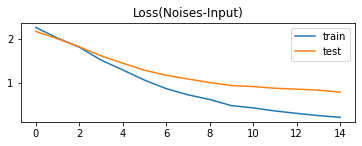

In [8]:
# plot loss during training
pyplot.subplot(211)
pyplot.title("Loss(Noises-Input)")
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()

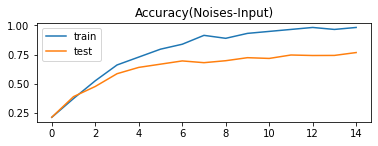

In [9]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title("Accuracy(Noises-Input)")
pyplot.plot(history.history['accuracy'], label = 'train')
pyplot.plot(history.history['val_accuracy'], label = 'test')
pyplot.legend()

# Adding Noises to the Activation Function

In [10]:
mnist = tf.keras.datasets.mnist # hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# narrow down the training sample size to 118
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
np.random.seed(2021)
train_size = 0.002
index = np.random.rand(len(x)) < train_size
x_train, x_test = x[index], x[~index]
y_train, y_test = y[index], y[~index]

In [13]:
# normalize 
x_train = tf.keras.utils.normalize(x_train, axis = 1) 
x_test = tf.keras.utils.normalize(x_test, axis = 1)


model = tf.keras.models.Sequential() # feedforward
model.add(tf.keras.layers.Flatten())

# Noise Layer
model.add(tf.keras.layers.GaussianNoise(0.1))

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #output layer; probability

model.compile(optimer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, verbose = 0)
_, train_acc = model.evaluate(x_train, y_train, verbose = 0)
_, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.983, Test: 0.752


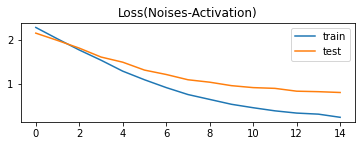

In [14]:
# plot loss during training
pyplot.subplot(211)
pyplot.title("Loss(Noises-Activation)")
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()

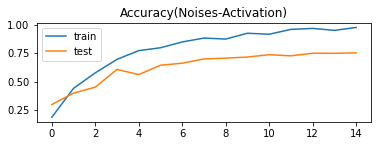

In [15]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title("Accuracy(Noises-Activation)")
pyplot.plot(history.history['accuracy'], label = 'train')
pyplot.plot(history.history['val_accuracy'], label = 'test')
pyplot.legend()